In [1]:
import os
import numpy as np
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load mechanism
mech_yaml = 'chem_annotated.yaml'
gas = ct.Solution(mech_yaml, 'gas')
surf = ct.Interface(mech_yaml, 'surface1', [gas])
print(f'This mechanism contains {gas.n_species} gas species and {surf.n_species} surface species')
print(f'This mechanism contains {gas.n_reactions} gas reactions and {surf.n_reactions} surface reactions')

This mechanism contains 22 gas species and 15 surface species
This mechanism contains 46 gas reactions and 62 surface reactions


In [3]:
gas.species()

[<Species Ar>,
 <Species Ne>,
 <Species N2>,
 <Species CH4(2)>,
 <Species O2(3)>,
 <Species CO2(4)>,
 <Species H2O(5)>,
 <Species H2(6)>,
 <Species CO(7)>,
 <Species C2H6(8)>,
 <Species CH2O(9)>,
 <Species CH3(10)>,
 <Species C3H8(11)>,
 <Species H(12)>,
 <Species C2H5(13)>,
 <Species CH3OH(14)>,
 <Species HCO(15)>,
 <Species CH3CHO(16)>,
 <Species OH(17)>,
 <Species C2H4(18)>,
 <Species CH3CH(19)>,
 <Species CH3OO(20)>]

In [4]:
surf.species()

[<Species X(1)>,
 <Species HX(21)>,
 <Species CO2X(22)>,
 <Species COX(23)>,
 <Species CH4X(24)>,
 <Species OX(25)>,
 <Species CH2X(26)>,
 <Species CH3X(27)>,
 <Species CHX(28)>,
 <Species CX(29)>,
 <Species H2X(30)>,
 <Species OHX(31)>,
 <Species H2OX(32)>,
 <Species CHOX(33)>,
 <Species CH2OX(170)>]

In [5]:
# Set initial conditions
T = 1000.0  # K
P = 100000.0  # Pa
initial_mole_fractions = 'CH4(2): 0.5, O2(3): 0.5'
initial_surface_coverages = 'X(1): 1.0'


gas.TPX = T, P, initial_mole_fractions
gas_reactor = ct.IdealGasReactor(gas, energy='off')  # energy off makes it isothermal

surf.TP = T, P                
surf.coverages = initial_surface_coverages
surf_reactor = ct.ReactorSurface(surf, gas_reactor)

net = ct.ReactorNet([gas_reactor])

times = [net.time]
volumes = [gas_reactor.volume]
pressures = [gas.P]
temperatures = [gas.T]

gas_concentrations = [gas.X]
surf_concentrations = [surf.coverages]

termination_time = 1.0  # s
while net.time < termination_time:
    net.step()
    times.append(net.time)
    volumes.append(gas_reactor.volume)
    pressures.append(gas.P)
    temperatures.append(gas.T)
    gas_concentrations.append(gas.X)
    surf_concentrations.append(surf.coverages)

                

Text(0, 0.5, 'Surface coverage fraction')

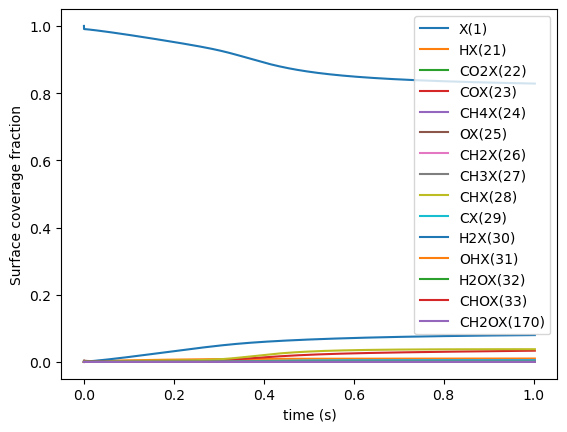

In [6]:
# plot some results
for i in range(len(surf.species())):
    conc = []
    for j in range(len(surf_concentrations)):
        conc.append(surf_concentrations[j][i])
#     conc = [x[i] for x in surf_concentrations]  # does the same as above, but written as a list comprehension
    plt.plot(times, conc, label=surf.species_names[i])
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('Surface coverage fraction')